In [ ]:
import numpy
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# Data preparation

In [ ]:
x_train = x_train.astype("float16")/255
x_test = x_test.astype("float16")/255

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
# on va rajouter un canal à toutes les images pour que le Sequential (réseau de neurones puisse correctement gérer le shape des inputs)
x_train = numpy.expand_dims(x_train, -1)
x_test = numpy.expand_dims(x_test, -1)

In [ ]:
x_train[0].shape

(28, 28, 1)

In [ ]:
# one hot enconding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
y_train[1010]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Créer le model CNN

In [ ]:
mon_premier_cnn = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        # encodeur
        keras.layers.Conv2D(128, kernel_size=(2, 2), activation="relu"),
        keras.layers.MaxPool2D(pool_size=(2,2)),

        keras.layers.Dropout(0.3),

        keras.layers.Conv2D(64, kernel_size=(2, 2), activation="relu"),
        keras.layers.MaxPool2D(pool_size=(2,2)),

        #connexion encodeur <-> classifier
        keras.layers.Flatten(),

        # Classifier
        keras.layers.Dense(10, activation="softmax") #softmax : plein de classes, sigmoid 2 : classes
    ]
)
mon_premier_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 27, 27, 128)       640       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 128)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 128)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        32832     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2304)             

In [ ]:
mon_premier_cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics="accuracy")
history = mon_premier_cnn.fit(x_train, y_train, batch_size=16, epochs=10)


Epoch 1/10
3750/3750 [==============================] - 16s 4ms/step - loss: 0.1578 - accuracy: 0.9512
Epoch 2/10
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0619 - accuracy: 0.9808
Epoch 3/10
3750/3750 [==============================] - 16s 4ms/step - loss: 0.0463 - accuracy: 0.9857
Epoch 4/10
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0392 - accuracy: 0.9876
Epoch 5/10
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0317 - accuracy: 0.9896
Epoch 6/10
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0288 - accuracy: 0.9910
Epoch 7/10
3750/3750 [==============================] - 16s 4ms/step - loss: 0.0232 - accuracy: 0.9926
Epoch 8/10
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0219 - accuracy: 0.9928
Epoch 9/10
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0193 - accuracy: 0.9936
Epoch 10/10
3750/3750 [==============================] - 15s 4ms/step - l

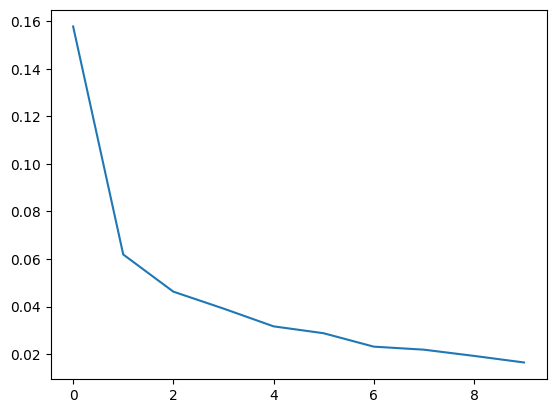

In [ ]:
plt.plot(history.history["loss"])
plt.show()

In [ ]:
mon_premier_cnn.predict(x_test[numpy.newaxis, 1010])

1/1 [==============================] - 0s 55ms/step


array([[2.3345623e-20, 5.7987388e-14, 1.3227434e-15, 1.6396012e-14,
        9.9999905e-01, 3.9141932e-12, 5.5910415e-19, 2.8069300e-09,
        1.6694517e-09, 9.9770227e-07]], dtype=float32)

In [ ]:
mon_premier_cnn.save("mon_premier_cnn.h5") # hdf5
from google.colab import files
files.download('mon_premier_cnn.h5')

#keras.load_model("./chemin_vers_fichier")# comment load un model entrainé

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>